In [4]:
import numpy as np
from gait_transformer.gait_phase_transformer import get_gait_phase_stride_transformer, gait_phase_stride_inference

model_params = {'transformer_layers': 6,
 'ffn_units_scale': 2,
 'projection_dim': 128,
 'layer_scale': False,
 'survival_prob': 1.0,
 'dropout_rate': 0.1,
 'num_heads': 3,
 'repeat_positional': True,
 'shared': True,
 'output_dropout_rate': 0,
 'derotate': False,
 'physics_consistency_loss': 0.001,
 'foot_vel_loss': False,
 'kp_idx_keep': [0, 1, 2, 3, 4, 5, 6, 11, 12, 13, 14, 15, 16],
 'mlp_head_units': [256, 256],
 'M': 19,
 'kp_dim': 17}

model = get_gait_phase_stride_transformer(**model_params)
model.load_weights('model.h5')



No derotate


In [5]:

L = 30 # run on a weight lenght of 30 frames
height = 1830
keypoints = np.load('keypoints.npy')
phase, stride = gait_phase_stride_inference(keypoints, height, model, L)


0it [00:00, ?it/s]2023-03-25 12:09:48.517142: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
9it [00:01,  6.36it/s]


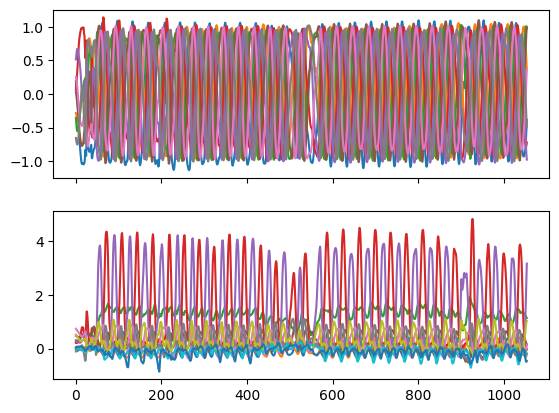

In [6]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(phase)
ax[1].plot(stride)

# Code below here is for reference only

This fetches the model weights and keypoints used for this demo and repository. It will not run outside of a much bigger DataJoint infrastructure.


In [ ]:

from gait_analysis.gait_decoder_training import ModelTraining, TrainValSplitLookup, ModelTrainingParam
from pose_pipeline import LiftingMethodLookup, TopDownMethodLookup

model_key = {'dataset_id': 11, 'train_hash': '-6307396184406739502'}
lifting_method = (TrainValSplitLookup & model_key).fetch1('lifting_method')
display(TopDownMethodLookup * LiftingMethodLookup & (TrainValSplitLookup & model_key))

key = (ModelTrainingParam & model_key).fetch1()
model_params = eval(key['model_params'])

kp_dim = 16 if lifting_method == 2 else 17
M = len((ModelTrainingParam & model_key).get_fields())

model_params['M'] = M
model_params['kp_dim'] = kp_dim
display(model_params)

model = (ModelTraining & model_key).get_model()
model.save_weights('model.h5')

top_down_method,lifting_method,top_down_method_name,lifting_method_name
0,0,MMPose,GastNet


{'transformer_layers': 6,
 'ffn_units_scale': 2,
 'projection_dim': 128,
 'layer_scale': False,
 'survival_prob': 1.0,
 'dropout_rate': 0.1,
 'num_heads': 3,
 'repeat_positional': True,
 'shared': True,
 'output_dropout_rate': 0,
 'derotate': False,
 'physics_consistency_loss': 0.001,
 'foot_vel_loss': False,
 'kp_idx_keep': [0, 1, 2, 3, 4, 5, 6, 11, 12, 13, 14, 15, 16],
 'mlp_head_units': [256, 256],
 'M': 19,
 'kp_dim': 17}

No derotate


In [ ]:
import numpy as np
from pose_pipeline import LiftingPerson, Video
from sensor_fusion.emgimu_session import Height, FirebaseSession

key = (LiftingPerson & {'top_down_method': 0, 'lifting_method': 0, 'video_project': 'PROSTHETIC_GAIT'}).fetch('KEY')[0]
height = (Height * FirebaseSession.AppVideo & key).fetch1('height_mm')
print(height)

keypoints = (LiftingPerson & key).fetch1('keypoints_3d')
np.save('keypoints.npy', keypoints)


1830.0
